<h1 style="text-align:center">NLP Lab 4</h1>

# Performed by : **Idriss Khattabi**
# Supervised by: **AACHAK Lotfi**

---------------
### **Objective** : The main purpose behind this lab is to get familiar with NLP language models using Pytorch library.

## part 1 :

#### 1- By using scrapping libraries (Scrapy / BeautifulSoup), try to collect text data from several Arabic web site concerning one topic then prepare your Dataset The score presents the relevance of each text (The score should be between 0 to 10).

#### => lets scrap data about artificial intelligence from arabic websites

In [2]:
# Import libraries for Data Scraping
import requests, re, csv
from bs4 import BeautifulSoup, NavigableString
import pandas as pd

In [75]:
# Function to remove tags with its content except the specified ones
def remove_tags(soup, preserve_tags):
    for tag in soup.find_all(True):  # Find all tags
        if tag.name not in preserve_tags:
            tag.decompose()  # Remove the tag with its content

def text_cleaning(text) :
    # Remove HTML tags 
    text = re.sub('<[^<]+?>', ' ', text)
    # Remove non-Arabic characters, digits, and punctuation
    text = re.sub(r'[^\u0600-\u06FF\s]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text

In [114]:
def scrip(url, special_tag, preserve_tags, will_remove_tags=True, headers=None) :
    result = requests.get(url, headers=headers)
    soup = BeautifulSoup(result.content, "lxml")
    if special_tag[1] != None :
        articles_container = soup.find(special_tag[0], special_tag[1])
    else : 
        articles_container = soup.find(special_tag[0])

    if will_remove_tags :
        remove_tags(articles_container, preserve_tags)
    
    cleaned_content = text_cleaning(str(articles_container))
    
    return cleaned_content

In [93]:
urls = [
    "https://mawdoo3.com/%D8%AA%D8%B9%D8%B1%D9%8A%D9%81_%D8%A7%D9%84%D8%B0%D9%83%D8%A7%D8%A1_%D8%A7%D9%84%D8%A7%D8%B5%D8%B7%D9%86%D8%A7%D8%B9%D9%8A",
    "https://ar.wikipedia.org/wiki/%D8%B0%D9%83%D8%A7%D8%A1_%D8%A7%D8%B5%D8%B7%D9%86%D8%A7%D8%B9%D9%8A",
    "https://www.aljazeera.net/tech/2016/5/4/%D8%A7%D9%84%D8%B0%D9%83%D8%A7%D8%A1-%D8%A7%D9%84%D8%A7%D8%B5%D8%B7%D9%86%D8%A7%D8%B9%D9%8A-%D9%85%D8%A7-%D9%87%D9%88-%D9%88%D9%85%D8%A7-%D8%A3%D8%A8%D8%B1%D8%B2-%D9%85%D8%B8%D8%A7%D9%87%D8%B1%D9%87",
    "https://aws.amazon.com/ar/what-is/artificial-intelligence/",
    "https://www.oracle.com/ae-ar/artificial-intelligence/what-is-ai/",
    "https://www.sap.com/mena-ar/products/artificial-intelligence/what-is-artificial-intelligence.html",
    "https://attaa.sa/library/view/1279",
    "https://www.jamous-tech.com/artificial-intelligence-ai/",
    "https://www.hindawi.org/books/48149074/1/",
    "https://www.annajah.net/%D8%A7%D9%84%D8%B0%D9%83%D8%A7%D8%A1-%D8%A7%D9%84%D8%A7%D8%B5%D8%B7%D9%86%D8%A7%D8%B9%D9%8A-%D8%AA%D8%B9%D8%B1%D9%8A%D9%81%D9%87-%D9%88%D8%A3%D9%87%D9%85%D9%8A%D8%AA%D9%87-%D9%88%D8%A3%D9%86%D9%88%D8%A7%D8%B9%D9%87-%D9%88%D8%A3%D9%87%D9%85-%D8%AA%D8%B7%D8%A8%D9%8A%D9%82%D8%A7%D8%AA%D9%87-article-30227",
    "https://sdaia.gov.sa/ar/SDAIA/about/Pages/AboutAI.aspx",
    "https://motaber.com/artificial-intelligence/",
    "https://www.argaam.com/ar/article/articledetail/id/1615530",
]

In [118]:
all_articles = []
for url, i in zip(urls, range(len(urls))) :
    will_remove_tags = True
    if i == 7 :
        will_remove_tags = False

    headers = None
    if i == 5 :
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
            "Accept-Encoding": "gzip, deflate, br",
            "Accept-Language": "ar",
            "Connection": "keep-alive",
        }
        
    preserve_tags = {'p', 'h2', 'h3', 'div', 'b'}
    if i == 4 : 
        preserve_tags = {'p', 'h2', 'h3', 'div', 'section'}
    if i == 5 or i == 6: 
        preserve_tags = {'p', 'h2', 'h3', 'div', 'section', 'span'}
    if i == 8 or i == 9 or i == 10: 
        preserve_tags = {'p', 'h2', 'h3', 'h5', 'div', 'ul', 'li' 'section', 'span'}
    if i == 11 or i == 12: 
        preserve_tags = {'p', 'h2', 'h3', 'h5', 'div', 'section', 'span', 'table', 'tbody', 'tr', 'td'}

    special_tag = ("div", {"id": "mw-content-text"})
    if i == 2 : special_tag = ("main", {"id": "main-content-area"})
    if i == 3 : special_tag = ("div", {"class": "eb-faq-content"})
    if i == 4 : special_tag = ("div", {"class": "f22w1"})
    if i == 5 : special_tag = ("div", {"class": "parContent"})
    if i == 6 : special_tag = ("div", {"class": "paragraph-display"})
    if i == 7 : special_tag = ("div", {"class": "entry-content single-content"})
    if i == 8 : special_tag = ("article", None)
    if i == 9 : special_tag = ("article", {'id': 'article-details'})
    if i == 10 : special_tag = ("div", {"class": "article-content"})
    if i == 11 : special_tag = ("div", {"class": "single-content"})
    if i == 12 : special_tag = ("div", {"id": "articledetail"})

    all_articles.append(scrip(url, special_tag, preserve_tags, will_remove_tags=will_remove_tags, headers=headers))

In [97]:
all_articles[12]

' أرقام شارك انسَخ رابِط المَقالْ يُقصد بالذكاء الاصطناعي أيّ قدرة الآلة على تعلّم كيفية إكمال المهام دون تعليمات بشرية صريحة ويرجع الفضل في تطوير فكرة الذكاء الاصطناعي عمومًا لعالم الرياضيات البريطاني آلان تورينج، والذي كان يؤمن بأهمية وجود آلات التفكير لحل المشكلات بشكل مستقل تمامًا مثل البشر، وهو معيار يُعرف باسم اختبار تورنغ يقدم هذا التقرير نظرة عامة على الذكاء الاصطناعي، وتعريفه، وأمثلة على استخدام الذكاء الاصطناعي في التمويل وتدبير الموارد المالية لا يوجد تعريف موحد للذكاء الاصطناعي، ولكن هناك تعريفًا مقبولًا بشكل عام يصفه بأنه تلك الآلات التي تستجيب للمحفزات بشكل متسق مع الاستجابات التقليدية للبشر، أي بالمقارنة مع قدرة الإنسان على التأمل وإصدار الأحكام وتكوين الرأي الذكاء الاصطناعي هو قدرة عامة على استخدام معطيات الوقت الفعلي لاتخاذ القرار حيث يتلقى الجهاز أو البرنامج تلك المعطيات من خلال أجهزة الاستشعار أو الإدخال عن بُعد أو رقميًا، ثم يقوم بتحليلها قبل اتخاذ القرار، وهي السمة التي تميزها عن آلة مبرمجة مسبقًا في مجال التمويل، يمكن استخدام الذكاء الاصطناعي في عملية الاكتتاب لمس

In [ ]:
articles = []
# the scoring is depending of the length of the text
scores = [7, 9, 5.5, 8, 7, 7.5, 6, 5, 8.5, 6.5, 6, 7.5, 5.5]

for article, score in zip(all_articles, scores) :
    articles.append({
        "Text": article,
        "Score": score,
        "WordNbr" : len(article.split())
    })

data = pd.DataFrame(articles)

In [121]:
# Storing the scraped data in a CSV file
columns = articles[0].keys()

with open("arabic_texts.csv", "w", encoding="utf-8-sig", newline="") as csv_file:
    dict_writer = csv.DictWriter(csv_file, columns)
    dict_writer.writeheader()
    dict_writer.writerows(articles)

    print("*"*50, "\n file created \n", "*"*50)

************************************************** 
 file created 
 **************************************************


In [100]:
data = pd.read_csv("arabic_texts.csv")

In [122]:
data

,Text,Score,WordNbr
0,محتويات يرتبط مفهوم الذكاء الاصطناعي بالإنجلي...,7.0,1031
1,ذكاء صناعي الْذَكَاءُ الْاِصْطِنَاعِيُّ أو ال...,9.0,3833
2,بات مصطلح الذكاء الاصطناعي كثير الاستخدام هذه...,5.5,664
3,ما المقصود بالذكاء الاصطناعي؟ الذكاء الاصطناع...,8.0,1984
4,استمتع بإنشاء التطبيقات واختبارها ونشرها على ...,7.0,1215
5,جاء تعريف مبكر للذكاء الاصطناعي من أحد آبائها...,7.5,1501
6,يعرف الذكاء الاصطناعي الذي يسمى اختصاراً ويعد...,6.0,1092
7,في ظل التطورات السريعة في الإنترنت ربما تكون ...,5.0,1254
8,الفصل الأول الهدف الأساسي من الذكاء الاصطناعي...,8.5,4523
9,تعريف الذكاء الاصطناعي يعد فرعاً من علوم الكم...,6.5,723


#### 2. Establish a preprocessing NLP pipeline (Tokenization stemming lemmatization, Stop words, Discretization, etc) of the collected Dataset.

In [126]:
import nltk, string
from nltk.tokenize import word_tokenize
from camel_tools.utils.dediac import dediac_ar
from camel_tools.utils.normalize import normalize_alef_maksura_ar, normalize_teh_marbuta_ar
# from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from farasa.stemmer import FarasaStemmer

# Download NLTK stopwords
# nltk.download('stopwords')
# nltk.download('punkt')

# Initialize components
stop_words = set(stopwords.words('arabic'))
stemmer = FarasaStemmer()

def preprocess_text(text):
    # Normalize text
    text = dediac_ar(text)  # Remove diacritics
    text = normalize_alef_maksura_ar(text)  # Normalize Alef Maksura
    text = normalize_teh_marbuta_ar(text)  # Normalize Teh Marbuta
    
    tokens = word_tokenize(text)
    
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Removing punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Remove '،' from each token
    tokens_lemma = [token.replace('،', '') for token in tokens]
    
    # Filter out empty tokens
    tokens_lemma = [token for token in tokens_lemma if token]
    
    # FarasaStemmer
    stemmed = stemmer.stem(" ".join(tokens_lemma))
    
    return stemmed, len(tokens_lemma)


In [124]:
processed_texts = []
nbr_words_processed_texts = []

for text in data['Text'] :
    preprocess_text1 , len_text = preprocess_text(text)
    processed_texts.append(preprocess_text1)
    nbr_words_processed_texts.append(len_text)
    
data['processed_text'] = processed_texts
data['ProcessedWordNbr'] = nbr_words_processed_texts

In [125]:
data

,Text,Score,WordNbr,processed_text,ProcessedWordNbr
0,محتويات يرتبط مفهوم الذكاء الاصطناعي بالإنجلي...,7.0,1031,محتوى ارتبط مفهوم ذكاء اصطناعي إنجليزي ذكاء مر...,860
1,ذكاء صناعي الْذَكَاءُ الْاِصْطِنَاعِيُّ أو ال...,9.0,3833,ذكاء صناعي ذكاء اصطناعي ذكاء صناعي ذكاء صنعي خ...,2964
2,بات مصطلح الذكاء الاصطناعي كثير الاستخدام هذه...,5.5,664,مصطلح ذكاء اصطناعي كثير استخدام يوم درج بعض تخ...,535
3,ما المقصود بالذكاء الاصطناعي؟ الذكاء الاصطناع...,8.0,1984,مقصود ذكاء اصطناعي ؟ ذكاء اصطناعي مجال علم كمب...,1689
4,استمتع بإنشاء التطبيقات واختبارها ونشرها على ...,7.0,1215,استمتع إنشاء تطبيق اختبار نشر علي مجان مصطلح ذ...,1001
5,جاء تعريف مبكر للذكاء الاصطناعي من أحد آبائها...,7.5,1501,جاء تعريف مبكر ذكاء اصطناعي آباء مؤسس وصف أن ص...,1178
6,يعرف الذكاء الاصطناعي الذي يسمى اختصاراً ويعد...,6.0,1092,عرف ذكاء اصطناعي سمى اختصار عد فرع فرع علم حاس...,875
7,في ظل التطورات السريعة في الإنترنت ربما تكون ...,5.0,1254,ظل تطور سريع إنترنت رب كان سمع ذكاء اصطناعي أخ...,1002
8,الفصل الأول الهدف الأساسي من الذكاء الاصطناعي...,8.5,4523,فصل أول هدف أساسي ذكاء اصطناعي تمكين أجهز كمبي...,3552
9,تعريف الذكاء الاصطناعي يعد فرعاً من علوم الكم...,6.5,723,تعريف ذكاء اصطناعي عد فرع علم كمبيوتر هدف إلى ...,610


In [127]:
print("Original Text :")
print(data["Text"][2])
print("*"*100)
print("processed_text : ")
print(data["processed_text"][2])

Original Text :
 بات مصطلح الذكاء الاصطناعي كثير الاستخدام هذه الأيام، لدرجة أن البعض أصبح يتخوف من أنه قد يعني سيطرة الآلات واضمحلال دور البشر، رغم أن الواقع ما يزال بعيدا جدا عن الاقتراب من هذا التصور، ف يعرف الذكاء الاصطناعي بأنه الذكاء الذي تبديه الآلات والبرامج بما يحاكي القدرات الذهنية البشرية وأنماط عملها، مثل القدرة على التعلم والاستنتاج ورد الفعل على أوضاع لم تبرمج في الآلة، كما أنه اسم لحقل أكاديمي يعنى بكيفية صنع حواسيب وبرامج قادرة على اتخاذ سلوك ذكي ويعرف كبار الباحثين الذكاء الاصطناعي بأنه دراسة وتصميم أنظمة ذكية تستوعب بيئتها وتتخذ إجراءات تزيد من فرص نجاحها ، في حين يعرفه جون مكارثي الذي وضع هذا المصطلح سنة بأنه علم وهندسة صنع آلات ذكية وخلال السنوات الأخيرة، قفز التطور في تقنية الذكاء الاصطناعي قفزات كبيرة، وتعد تقنية التعلم العميق أبرز مظاهره، وهي ترتكز على تطوير شبكات عصبية صناعية تحاكي في طريقة عملها أسلوب الدماغ البشري، أي أنها قادرة على التجريب والتعلم وتطوير نفسها ذاتيا دون تدخل الإنسان وأثبتت تقنية التعلم العميق قدرتها على التعرف على الصور وفهم الكلام والترجمة م

#### 3. Train your models by using RNN, Bidirectional RNN GRU and LSTM Architectures and tuning hyper-parameters to get the best performance

In [129]:
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from nltk.tokenize import word_tokenize
# from collections import Counter
# from torchtext.vocab import build_vocab_from_iterator
import gensim
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

# Example Arabic texts and labels
texts = data["processed_text"]
scores = data["Score"]  # Regression scores

# Tokenize the texts
tokenized_texts = [word_tokenize(text) for text in texts]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=1000, window=5, min_count=1, sg=1)

# Convert texts to Word2Vec embeddings
def texts_to_embeddings(texts, model, maxlen):
    embeddings = []
    for text in texts:
        tokens = word_tokenize(text)
        text_embedding = [model.wv[token] if token in model.wv else np.zeros(model.vector_size) for token in tokens]
        if len(text_embedding) < maxlen:
            text_embedding.extend([np.zeros(model.vector_size)] * (maxlen - len(text_embedding)))
        else:
            text_embedding = text_embedding[:maxlen]
        embeddings.append(text_embedding)
    return np.array(embeddings)

# Set the maximum length for padding
maxlen = 1500

# Convert texts to embeddings and pad sequences
data2 = texts_to_embeddings(texts, word2vec_model, maxlen)

# Convert scores to numpy array
scores = np.array(scores)

# Convert data to PyTorch tensors
X = torch.tensor(data2, dtype=torch.float32)
y = torch.tensor(scores, dtype=torch.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [130]:

# Define the models
class RNNRegressor(nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        super(RNNRegressor, self).__init__()
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        output, _ = self.rnn(x)
        output = self.fc(output[:, -1, :])
        return output

class BidirectionalRNNRegressor(nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        super(BidirectionalRNNRegressor, self).__init__()
        self.rnn = nn.RNN(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, 1)

    def forward(self, x):
        output, _ = self.rnn(x)
        output = self.fc(output[:, -1, :])
        return output

class GRURegressor(nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        super(GRURegressor, self).__init__()
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        output, _ = self.gru(x)
        output = self.fc(output[:, -1, :])
        return output

class LSTMRegressor(nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        output, _ = self.lstm(x)
        output = self.fc(output[:, -1, :])
        return output

In [131]:
# Define hyperparameters
embedding_dim = 1000  # Dimension of the word embeddings (same as Word2Vec vector size)
hidden_dim = 500 #128  # Dimension of the hidden state

# Initialize the models, loss functions, and optimizers
rnn_model = RNNRegressor(embedding_dim, hidden_dim)
bidirectional_rnn_model = BidirectionalRNNRegressor(embedding_dim, hidden_dim)
gru_model = GRURegressor(embedding_dim, hidden_dim)
lstm_model = LSTMRegressor(embedding_dim, hidden_dim)

criterion = nn.MSELoss()
optimizer_rnn = optim.Adam(rnn_model.parameters(), lr=0.001)
optimizer_bidirectional_rnn = optim.Adam(bidirectional_rnn_model.parameters(), lr=0.001)
optimizer_gru = optim.Adam(gru_model.parameters(), lr=0.001)
optimizer_lstm = optim.Adam(lstm_model.parameters(), lr=0.001)

In [132]:
# Train the models
num_epochs = 10
batch_size = 5  # Adjust the batch size as needed

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        # Train RNN model
        optimizer_rnn.zero_grad()
        outputs = rnn_model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer_rnn.step()

        # Train Bidirectional RNN model
        optimizer_bidirectional_rnn.zero_grad()
        outputs = bidirectional_rnn_model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer_bidirectional_rnn.step()

        # Train GRU model
        optimizer_gru.zero_grad()
        outputs = gru_model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer_gru.step()

        # Train LSTM model
        optimizer_lstm.zero_grad()
        outputs = lstm_model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer_lstm.step()

    print(f'Epoch [{epoch+1}/{num_epochs}] completed')

Epoch [1/10] completed
Epoch [2/10] completed
Epoch [3/10] completed
Epoch [4/10] completed
Epoch [5/10] completed
Epoch [6/10] completed
Epoch [7/10] completed
Epoch [8/10] completed
Epoch [9/10] completed
Epoch [10/10] completed


#### 4. Evaluate the four languages models by using standards metrics and other metrics like blue score.

In [135]:
# Evaluate the models
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        mse = criterion(outputs.squeeze(), y_test)
    model.train()
    return mse.item()

rnn_mse = evaluate_model(rnn_model, X_test, y_test)
bidirectional_rnn_mse = evaluate_model(bidirectional_rnn_model, X_test, y_test)
gru_mse = evaluate_model(gru_model, X_test, y_test)
lstm_mse = evaluate_model(lstm_model, X_test, y_test)

# Print results
print('/'*50)
print(f'RNN Mean Squared Error: {rnn_mse:.4f}')
print(f'Bidirectional RNN Mean Squared Error: {bidirectional_rnn_mse:.4f}')
print(f'GRU Mean Squared Error: {gru_mse:.4f}')
print(f'LSTM Mean Squared Error: {lstm_mse:.4f}')
print('/'*50)


//////////////////////////////////////////////////
RNN Mean Squared Error: 0.5741
Bidirectional RNN Mean Squared Error: 1.5631
GRU Mean Squared Error: 1.0088
LSTM Mean Squared Error: 0.4177
//////////////////////////////////////////////////


-----------------
## Part 2 - Transformer (Text generation) :

In [2]:
# Load the GPT-2 Pre-trained Model
import pandas as pd
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from torch.utils.data import Dataset, DataLoader, RandomSampler
import torch, json
from transformers import GPT2LMHeadModel
import torch.optim as optim
from transformers import AdamW, get_linear_schedule_with_warmup
from torch.nn.utils.rnn import pad_sequence

import logging
logging.getLogger().setLevel(logging.CRITICAL)

import warnings
warnings.filterwarnings('ignore')

# use cuda if available to accelerate tensor operations by executing them on NVIDIA GPUs
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'


In [7]:
# Load pre-trained model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

##### we will gonna train this model on movies dataset

In [2]:
# Load and Preprocess the Dataset
df = pd.read_csv('tmdb_5000_movies.csv')
# source  : https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

In [50]:
# keep only 200 line because the dataset is large and will take a long time to train the LLM
df =df.head(200)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                200 non-null    int64  
 1   genres                200 non-null    object 
 2   homepage              153 non-null    object 
 3   id                    200 non-null    int64  
 4   keywords              200 non-null    object 
 5   original_language     200 non-null    object 
 6   original_title        200 non-null    object 
 7   overview              200 non-null    object 
 8   popularity            200 non-null    float64
 9   production_companies  200 non-null    object 
 10  production_countries  200 non-null    object 
 11  release_date          200 non-null    object 
 12  revenue               200 non-null    int64  
 13  runtime               200 non-null    float64
 14  spoken_languages      200 non-null    object 
 15  status                2

In [3]:
# Extract the 'overview', 'title', and 'keywords' fields
overviews = df['overview'].tolist() 
titles = df['title'].tolist()
keywords = df['keywords'].apply(lambda x: json.loads(x)).tolist()

In [53]:
print(keywords[0])

[{'id': 1463, 'name': 'culture clash'}, {'id': 2964, 'name': 'future'}, {'id': 3386, 'name': 'space war'}, {'id': 3388, 'name': 'space colony'}, {'id': 3679, 'name': 'society'}, {'id': 3801, 'name': 'space travel'}, {'id': 9685, 'name': 'futuristic'}, {'id': 9840, 'name': 'romance'}, {'id': 9882, 'name': 'space'}, {'id': 9951, 'name': 'alien'}, {'id': 10148, 'name': 'tribe'}, {'id': 10158, 'name': 'alien planet'}, {'id': 10987, 'name': 'cgi'}, {'id': 11399, 'name': 'marine'}, {'id': 13065, 'name': 'soldier'}, {'id': 14643, 'name': 'battle'}, {'id': 14720, 'name': 'love affair'}, {'id': 165431, 'name': 'anti war'}, {'id': 193554, 'name': 'power relations'}, {'id': 206690, 'name': 'mind and soul'}, {'id': 209714, 'name': '3d'}]


In [4]:
# Extract keyword names
def extract_keyword_names(keyword_list):
    return [keyword['name'] for keyword in keyword_list]

keyword_names = [extract_keyword_names(kw) for kw in keywords]

In [5]:
# Combine overviews, titles, and keywords
movie_data = [{'title': title, 'overview': overview, 'keywords': keyword_names} for title, overview, keyword_names in zip(titles, overviews, keyword_names)]

In [56]:
pd.DataFrame(movie_data).head()

,title,overview,keywords
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i..."
4,John Carter,"John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel..."


In [8]:

class MovieDataset(Dataset):
    def __init__(self, tokenizer, movie_data, block_size=512):
        self.examples = []
        self.tokenizer = tokenizer
        self.block_size = block_size
        
        for data in movie_data:
            title = data['title']
            overview = data['overview']
            keywords = list(data['keywords'])
            keyword_string = ", ".join(keywords)  # Convert keywords to a comma-separated string
            text = f"movie name : {title} | overview : {overview} | Keywords : {keyword_string}"  # Combine title, overview, and keywords
            tokenized_text = tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=block_size)
            self.examples.append(tokenized_text)
    
    def __len__(self):
        return len(self.examples)
    
    def __getitem__(self, item):
        return torch.tensor(self.examples[item], dtype=torch.long)

    def collate_fn(self, batch):
        # Pad sequences to the maximum length in the batch
        padded_batch = pad_sequence(batch, batch_first=True, padding_value=tokenizer.pad_token_id if tokenizer.pad_token_id is not None else 0)
        return padded_batch

# Create dataset and dataloader
dataset = MovieDataset(tokenizer, movie_data)
data_loader = DataLoader(dataset, sampler=RandomSampler(dataset), batch_size=2, collate_fn=dataset.collate_fn)

In [9]:
dataset[0]

tensor([41364,  1438,  1058, 26703,   930, 16700,  1058,   554,   262,  2534,
          358,  4289,    11,   257, 41406,  1455,   291, 11000,   318, 26562,
          284,   262,  8824, 28518,   319,   257,  3748,  4365,    11,   475,
         4329, 12445,  1022,  1708,  6266,   290, 10192,   281,  8756, 14355,
           13,   930,  7383, 10879,  1058,  3968, 19122,    11,  2003,    11,
         2272,  1175,    11,  2272, 18815,    11,  3592,    11,  2272,  3067,
           11, 36701,    11, 19661,    11,  2272,    11,  8756,    11, 14893,
           11,  8756,  5440,    11,   269, 12397,    11, 16050,    11, 10686,
           11,  3344,    11,  1842, 14669,    11,  3098,  1175,    11,  1176,
         2316,    11,  2000,   290,  5848,    11,   513,    67])

In [21]:
len(dataset)

4803

In [62]:
# Fine-tune the Model
def train(model, data_loader, epochs=1):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    
    optimizer = AdamW(model.parameters(), lr=5e-5)
    total_steps = len(data_loader) * epochs
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
    
    model.train()
    for epoch in range(epochs):
        for batch in data_loader:
            inputs = batch.to(device)
            outputs = model(inputs, labels=inputs)
            loss = outputs.loss
            loss.backward()
            
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()
            
            print(f"Epoch: {epoch}, Loss: {loss.item()}")

# Load model
model = GPT2LMHeadModel.from_pretrained(model_name)

# Train the model
train(model, data_loader, epochs=3)

Epoch: 0, Loss: 4.281391620635986
Epoch: 0, Loss: 2.977623224258423
Epoch: 0, Loss: 3.9310193061828613
Epoch: 0, Loss: 3.681670665740967
Epoch: 0, Loss: 3.6696484088897705
Epoch: 0, Loss: 2.7895991802215576
Epoch: 0, Loss: 2.7860119342803955
Epoch: 0, Loss: 3.1522040367126465
Epoch: 0, Loss: 3.1355981826782227
Epoch: 0, Loss: 3.7260866165161133
Epoch: 0, Loss: 3.2977912425994873
Epoch: 0, Loss: 3.302785873413086
Epoch: 0, Loss: 2.4102747440338135
Epoch: 0, Loss: 2.958753824234009
Epoch: 0, Loss: 3.6569931507110596
Epoch: 0, Loss: 3.0554277896881104
Epoch: 0, Loss: 3.113213539123535
Epoch: 0, Loss: 2.4519002437591553
Epoch: 0, Loss: 2.666919708251953
Epoch: 0, Loss: 2.7734692096710205
Epoch: 0, Loss: 3.0338475704193115
Epoch: 0, Loss: 3.223327159881592
Epoch: 0, Loss: 3.0406789779663086
Epoch: 0, Loss: 3.259910821914673
Epoch: 0, Loss: 2.7189362049102783
Epoch: 0, Loss: 3.221954107284546
Epoch: 0, Loss: 2.173658609390259
Epoch: 0, Loss: 2.634922742843628
Epoch: 0, Loss: 2.39680886268615

In [37]:
# Function to generate text
def generate_text(model, tokenizer, prompt, max_length=100):
    model.eval()
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    input_ids = input_ids.to(model.device)
    
    with torch.no_grad():
        output = model.generate(
            input_ids,
            max_length=max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            top_k=50,
            top_p=0.95,
            temperature=0.7,
        )
        
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

#### test the LLM before the training :

In [35]:
prompt = "'avatar' movie"
generated_paragraph = generate_text(model, tokenizer, prompt)
print(generated_paragraph)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'avatar' movie, it's a true success.

"I am the first to admit that I am not the most talented director," she said. "But I did it because I wanted to make a movie about women, and it is about the impact and beauty of women. It is not about trying to tell you how to be a feminist, but about how you can be the best you could be if you're a woman."
.


In [36]:
prompt = "overview about 'Pirates of the Caribbean' movie"
generated_paragraph = generate_text(model, tokenizer, prompt)
print(generated_paragraph)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


overview about 'Pirates of the Caribbean' movie and the "unholy grail" of modern-day Hollywood, has been met with a wave of negative responses, which in turn have led to the release of a new movie, a "Pirate of Hearts" trailer, and a more recent interview with the star of The Avengers.

After the trailer was released, many fans asked for more information about "The Avengers," and when asked if they are going to see "Captain America


In [38]:
prompt = "Inception movie"
generated_paragraph = generate_text(model, tokenizer, prompt)
print(generated_paragraph)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Inception movie, but not a movie.

The movie came out on DVD with a DVD insert. It was a nice little thing. The film's music was nice and upbeat. I didn't really understand the movie's lyrics. And I was just in awe of the music. But I also liked the way the lyrics were written. When I heard the song, I thought, "This is a great song."
 and I just loved the sound of it. You could tell the actors


In [60]:
prompt = "movie"
generated_paragraph = generate_text(model, tokenizer, prompt)
print(generated_paragraph)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


movie.com/watch/8EzF9I3lNg — Michael Cohen (@MichaelCohen) July 16, 2016

There were a couple of others that did not get much attention.
.@Michael_Cohens: "You know what? If I had my way, I'd like to have a little bit of a 'wow' moment with you. I don't know if it's a nice, emotional moment for you or not, but it will be


In [61]:
prompt = "movie name"
generated_paragraph = generate_text(model, tokenizer, prompt)
print(generated_paragraph)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


movie name="http://www.youtube.com/watch?v=rS5KX3u1qRQ&feature=youtu.be" title="The Best of the Best" ]

"The best of" is a term used to describe the best performances by a person who has made it to the top of a list, or has won a Grammy for a performance.
: Best Actor for the First Time. [1]
- In a movie, a


---------
#### test the LLM after the training :

In [63]:
prompt = "'avatar' movie"
generated_paragraph = generate_text(model, tokenizer, prompt)
print(generated_paragraph)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'avatar' movie is based on the novel by Alex Gibney, based around the fictional world of Snow White and the Huntsman. The film is set during the reign of King Gizzard and Her Men, and based upon the events of The Lord of the Rings trilogy. Gibneys novel is also based in the United Kingdom, where it is known as The Snow Queen.

The film will be based loosely around Peter Jackson's Hobbit: The Battle of Five Armies, which is a


In [64]:
prompt = "overview about 'Pirates of the Caribbean' movie"
generated_paragraph = generate_text(model, tokenizer, prompt)
print(generated_paragraph)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


overview about 'Pirates of the Caribbean' movie and its sequel. | Keywords : based on novel, pirate, adventure, film, based upon comic book, pixies, superhero, love of life, sequel, aftercreditsstinger, island, credits, duringcave, villain, whencameo, marvel cinematic universe, magic sword, 3d, director, dream, imax, remake, riddle, nameless hero, ghost, underwater, mermaid


In [65]:
prompt = "Inception movie"
generated_paragraph = generate_text(model, tokenizer, prompt)
print(generated_paragraph)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Inception movie: The Great Gatsby | overview: When a pair of gaggle over a cheeseburger and a couple of beers, the young couple is led to believe that the world has gone mad. The town has been hit by a massive explosion and the town is in danger of becoming a disaster. But the kids are not the only ones who are shaken by the chaos. They must find a way to save the village and save their friends. | Keywords : explosion, g


In [66]:
prompt = "movie"
generated_paragraph = generate_text(model, tokenizer, prompt)
print(generated_paragraph)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


movie name : The Hobbit: An Unexpected Journey | overview : Bilbo Baggins is an orphan. When his father, Gandalf, is killed by the evil Lord Sauron, Bilb has been left with nothing to live on. Gand is forced to find a new home, as his parents and brother leave him to become the Dwarves. | Keywords : son of the dragon, forest, adventure, hobbit, elves, dwarves, 3d, goblin, aftercreditsstinger


In [67]:
prompt = "movie name"
generated_paragraph = generate_text(model, tokenizer, prompt)
print(generated_paragraph)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


movie name : X-Men: First Class | overview : Following the events of X: The Last Stand, a group of mutants from X, Magneto, Cyclops and Apocalypse go on a mission to stop the mutant invasion of Earth, which will change the course of the entire world. | Keywords : mutant, marvel comic, based on comic book, duringcreditsstinger, aftercrisis, sequel, mutant vs. villain, superhuman, supervillain, time travel, super speed


In [69]:
prompt = "movie name : avatar"
generated_paragraph = generate_text(model, tokenizer, prompt)
print(generated_paragraph)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


movie name : avatar | overview : A young boy with a crush on an avatar named Skye, the young avatar joins forces with his friend Skyler to help him get back to his former self. | Keywords : video games, video game, dream, 3d, avatar, animation, aftercreditsstinger, sequel, marvel cinematic universe, imax, germany, based on video arcade, whencameo!!!'!!.!!, 3D, game based upon


----------
## Part 3 : BERT

##### Import the DataSet : 

In [3]:
# Pandas data frame : This code reads the data into a pandas data frame:
import gzip, json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Magazine_Subscriptions_5.json.gz')

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,4.0,True,"02 26, 2014",A5QQOOZJOVPSF,B00005N7P0,John L. Mehlmauer,"I'm old, and so is my computer. Any advice th...",Cheapskates guide,1393372800,NaN,NaN,NaN
1,5.0,False,"03 6, 2004",A5RHZE7B8SV5Q,B00005N7PS,gorillazfan249,"There's nothing to say, but if you want a REAL...",The best mature Men's magazine.,1078531200,3,NaN,NaN
2,1.0,False,"07 15, 2003",A1RPTVW5VEOSI,B00005N7PS,Michael J. Edelman,If you're the kind of man who looks at himself...,THE Magazine for the Self-Centered Male,1058227200,17,NaN,NaN
3,1.0,True,"01 31, 2015",A1SFRBCMW8XVBW,B00005N7PS,Hoyett L. Barnett,Nothing to it. Just an advertisement. Little...,Nothing to it. Just an advertisement. Little a...,1422662400,NaN,NaN,NaN
4,5.0,True,"10 5, 2010",A1IU9VPCBKZPE8,B00005N7P0,Randolph Eck,When PC Magazine ceased publication of their p...,Excellent Computer Magazine,1286236800,2,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         2375 non-null   float64
 1   verified        2375 non-null   bool   
 2   reviewTime      2375 non-null   object 
 3   reviewerID      2375 non-null   object 
 4   asin            2375 non-null   object 
 5   reviewerName    2375 non-null   object 
 6   reviewText      2374 non-null   object 
 7   summary         2373 non-null   object 
 8   unixReviewTime  2375 non-null   int64  
 9   vote            569 non-null    object 
 10  style           1625 non-null   object 
 11  image           1 non-null      object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 225.0+ KB


In [6]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer, set_seed

# Filter relevant columns
df = df[['reviewText', 'overall']]

# Use a subset of the data for demonstration purposes
df = df.head(500)

# Create sentiment labels
def get_sentiment_label(rating):
    if rating >= 4:
        return 2  # Positive
    elif rating == 3:
        return 1  # Neutral
    else:
        return 0  # Negative

df['sentiment'] = df['overall'].apply(get_sentiment_label)

# Drop rows with missing reviewText or sentiment
df = df.dropna(subset=['reviewText', 'sentiment'])

In [13]:
df.head(7)

,reviewText,overall,sentiment
0,"I'm old, and so is my computer. Any advice th...",4.0,2
1,"There's nothing to say, but if you want a REAL...",5.0,2
2,If you're the kind of man who looks at himself...,1.0,0
3,Nothing to it. Just an advertisement. Little...,1.0,0
4,When PC Magazine ceased publication of their p...,5.0,2
5,Details is much less indepth / informative as ...,4.0,2
6,In my mind BEST PC Magazine for upgrades / har...,5.0,2


In [8]:
# Split the dataset into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert pandas DataFrame to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

# Load the tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to tokenize the text
def tokenize_function(examples):
    return bert_tokenizer(examples['reviewText'], padding="max_length", truncation=True, max_length=512)

# Tokenize the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

# Remove the original text column and the index column to avoid confusion during training
train_dataset = train_dataset.remove_columns(['reviewText', '__index_level_0__'])
val_dataset = val_dataset.remove_columns(['reviewText', '__index_level_0__'])

# Set the format for PyTorch tensors and define the column for labels
train_dataset = train_dataset.rename_column("sentiment", "labels")
val_dataset = val_dataset.rename_column("sentiment", "labels")

train_dataset.set_format("torch")
val_dataset.set_format("torch")

# Load the pre-trained BERT model
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)


Map:   0%|          | 0/399 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
# Set training arguments
training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    evaluation_strategy="epoch",     # Evaluation strategy to use
    learning_rate=2e-5,              # Learning rate
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=8,    # Batch size for evaluation
    num_train_epochs=3,              # Number of training epochs
    weight_decay=0.01,               # Strength of weight decay
)

# Create Trainer instance
trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()


/home/idriss/.local/lib/python3.11/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.625213
2,No log,0.431438
3,No log,0.383723


TrainOutput(global_step=150, training_loss=0.526092529296875, metrics={'train_runtime': 2559.0215, 'train_samples_per_second': 0.468, 'train_steps_per_second': 0.059, 'total_flos': 314946761020416.0, 'train_loss': 0.526092529296875, 'epoch': 3.0})

In [10]:
# Evaluate the model
trainer.evaluate()

{'eval_loss': 0.38372302055358887,
 'eval_runtime': 52.7556,
 'eval_samples_per_second': 1.896,
 'eval_steps_per_second': 0.246,
 'epoch': 3.0}

Accuracy: 0.87


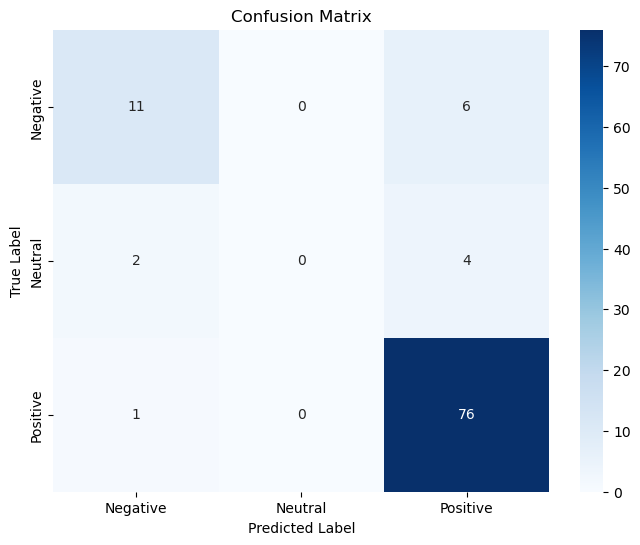

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for validation set
predictions = trainer.predict(val_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Get true labels
true_labels = val_dataset['labels']

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Define labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Synthesis of the Lab :

#### Part 1: Classification Regression

1. **Data Collection**:
   - Utilized web scraping tools like Scrapy and BeautifulSoup to collect Arabic text data on a specific topic.
   - Created a dataset where each text is assigned a relevance score between 0 and 10.

2. **Preprocessing Pipeline**:
   - Performed text tokenization to split the text into individual tokens.
   - Applied stemming and lemmatization to reduce words to their base or root form.
   - Removed stop words to eliminate common words that do not contribute to the model's performance.
   - Discretized scores to convert continuous relevance scores into discrete categories if necessary.

3. **Model Training**:
   - Trained four different models: RNN, Bidirectional RNN, GRU, and LSTM.
   - Tuned hyperparameters such as learning rate, batch size, number of layers, and hidden units to optimize model performance.

4. **Model Evaluation**:
   - Evaluated models using standard metrics such as accuracy, precision, recall, F1 score, and custom metrics like the BLEU score.

#### Part 2: Transformer (Text Generation)

1. **Model Setup**:
   - Installed the PyTorch-Transformers library and loaded the pre-trained GPT-2 model.

2. **Fine-Tuning**:
   - Fine-tuned the GPT-2 model on a custom dataset to adapt it to specific text generation tasks.

3. **Text Generation**:
   - Generated new paragraphs based on given sentences to test the fine-tuned model's text generation capabilities.

#### Part 3: BERT

1. **Data Preparation**:
   - Used the Amazon review dataset provided (https://nijianmo.github.io/amazon/index.html).
   - Prepared and preprocessed the data to be compatible with BERT input requirements.

2. **Model Adaptation**:
   - Adapted the BERT embedding layer to the dataset and fine-tuned the pre-trained BERT model.

3. **Training and Hyperparameter Tuning**:
   - Fine-tuned the BERT model with various hyperparameters to achieve optimal performance.

4. **Model Evaluation**:
   - Evaluated the model using standard metrics (accuracy, loss, F1 score) and specific metrics like BLEU score and BERT score.

5. **Conclusion**:
   - Summarized the effectiveness and efficiency of using pre-trained BERT models for text classification and regression tasks.


## References : 
- https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/
- https://www.geeksforgeeks.org/sentiment-analysis-with-an-recurrent-neural-networks-rnn/
- https://www.geeksforgeeks.org/large-language-model-llm/
- https://www.geeksforgeeks.org/getting-started-with-transformers/
- https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/
- https://towardsdatascience.com/how-to-fine-tune-gpt-2-for-text-generation-ae2ea53bc272
- https://www.datacamp.com/tutorial/fine-tuning-large-language-models
- https://datagy.io/pytorch-tutorial/
- https://www.learnpytorch.io/
- 